#  <span style="color:orange">Multiclass Classification Tutorial (MCLF101) - Level Beginner</span>

**Created using: PyCaret 2.0** <br />
**Date Updated: August 24, 2020**

# 1.0 Tutorial Objective
Welcome to the Multiclass Classification Tutorial **(MCLF101)** - Level Beginner. This tutorial assumes that you are new to PyCaret and looking to get started with Multiclass Classification using the `pycaret.classification` Module.

In this tutorial we will learn:


* **Getting Data:**  How to import data from PyCaret repository
* **Setting up Environment:**  How to setup an experiment in PyCaret and get started with building multiclass models
* **Create Model:**  How to create a model, perform stratified cross validation and evaluate classification metrics
* **Tune Model:**  How to automatically tune the hyper-parameters of a multiclass model
* **Plot Model:**  How to analyze model performance using various plots
* **Finalize Model:** How to finalize the best model at the end of the experiment
* **Predict Model:**  How to make predictions on new / unseen data
* **Save / Load Model:**  How to save / load a model for future use

Read Time : Approx. 30 Minutes


# 1.1 Installing PyCaret
The first step to get started with PyCaret is to install pycaret. Installation is easy and will only take a few minutes. Follow the instructions below:

# Installing PyCaret in Local Jupyter Notebook
`pip install pycaret`  <br />

# Installing PyCaret on Google Colab or Azure Notebooks
`!pip install pycaret`


# 1.2 Pre-Requisites
- Python 3.6 or greater
- PyCaret 2.0 or greater
- Internet connection to load data from pycaret's repository
- Basic Knowledge of Multiclass Classification

# 1.3 For Google colab users:
If you are running this notebook on Google colab, run the following code at top of your notebook to display interactive visuals.<br/>
<br/>
`from pycaret.utils import enable_colab` <br/>
`enable_colab()`

# 1.4 See also:
- __[Binary Classification Tutorial (CLF101) - Level Beginner](https://github.com/pycaret/pycaret/blob/master/tutorials/Binary%20Classification%20Tutorial%20Level%20Beginner%20-%20%20CLF101.ipynb)__
- __[Binary Classification Tutorial (CLF102) - Level Intermediate](https://github.com/pycaret/pycaret/blob/master/tutorials/Binary%20Classification%20Tutorial%20Level%20Intermediate%20-%20CLF102.ipynb)__

In [1]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 5.0 MB/s 
     |████████████████████████████████| 5.0 MB 40.0 MB/s 
     |████████████████████████████████| 16.5 MB 40.5 MB/s 
     |████████████████████████████████| 167 kB 48.3 MB/s 
     |████████████████████████████████| 662 kB 57.6 MB/s 
     |████████████████████████████████| 2.0 MB 52.9 MB/s 
     |████████████████████████████████| 3.3 MB 46.9 MB/s 
     |████████████████████████████████| 141 kB 62.4 MB/s 
     |████████████████████████████████| 6.8 MB 24.6 MB/s 
     |████████████████████████████████| 25.8 MB 1.6 MB/s 
     |████████████████████████████████| 1.7 MB 61.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 325 kB 67.8 MB/s 
     |██████████████████████████████

# 2.0 What is Multiclass Classification?
Multiclass classification is a supervised machine learning technique where the goal is to classify instances into one of three or more classes. (Classifying instances into one of two classes is called Binary Classification). Multiclass classification should not be confused with multi-label classification, where multiple labels are to be predicted for each instance.

__[Learn More about Multiclass Classification](https://towardsdatascience.com/machine-learning-multiclass-classification-with-imbalanced-data-set-29f6a177c1a)__

# 3.0 Overview of the Classification Module in PyCaret
PyCaret's classification module (`pycaret.classification`) is a supervised machine learning module which is used for classifying the elements into binary or multinomial groups based on various techniques and algorithms. 

The PyCaret classification module can be used for Binary or Multi-class classification problems. It has over 18 algorithms and 14 plots to analyze the performance of models. Be it hyper-parameter tuning, ensembling or advanced techniques like stacking, PyCaret's classification module has it all.

# 4.0 Dataset for the Tutorial

For this tutorial we will use the **king-rook-vs-king-pawn** from UCI. The data set contains 2 classes where:
In 1669 of the positions (52%), White can win ("won").
In 1527 of the positions (48%), White cannot win ("nowin").
, where each class refers to a result of white winning or not winning the chess game. Short descriptions of each column are as follows:

The first 36 attributes describe the board.  The last (37th) attribute is the
classification: "win" or "nowin".  There are 0 missing values.
# Dataset Acknowledgement:
Creator: 

    (a) Database originally generated and described by Alen Shapiro.

    (b) Donor/Coder: Rob Holte (holte@uottawa.bitnet).  The database
        was supplied to Holte by Peter Clark of the Turing Institute
        in Glasgow (pete@turing.ac.uk).
    (c) Date: 1 August 1989

The original dataset and data dictionary can be __[found here.](https://archive.ics.uci.edu/ml/machine-learning-databases/chess/king-rook-vs-king-pawn/)__ 

# 5.0 Getting the Data

You can download the data from the original source __[found here](https://archive.ics.uci.edu/ml/datasets/Iris)__ and load it using pandas __[(Learn How)](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)__ or you can use PyCaret's data respository to load the data using the `get_data()` function (This will require an internet connection).

In [1]:
from pycaret.utils import enable_colab
enable_colab()
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/chess/king-rook-vs-king-pawn/kr-vs-kp.data

Colab mode enabled.
--2022-12-02 13:58:07--  https://archive.ics.uci.edu/ml/machine-learning-databases/chess/king-rook-vs-king-pawn/kr-vs-kp.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 245952 (240K) [application/x-httpd-php]
Saving to: ‘kr-vs-kp.data’

kr-vs-kp.data       100%[===================>] 240.19K   937KB/s    in 0.3s    

2022-12-02 13:58:07 (937 KB/s) - ‘kr-vs-kp.data’ saved [245952/245952]



In [56]:
import pandas as pd
#check the shape of data
dataset = pd.read_csv('kr-vs-kp.data', header = None)
print('Shape of data is: '+ str(dataset.shape))
##Renaming the last columns as 'Result' for testing purposes
listofcols = list(range(36))
listofcols.append('Result')
dataset.columns = listofcols
dataset

Shape of data is: (3196, 37)


,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,Result
0,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,t,t,n,won
1,f,f,f,f,t,f,f,f,f,f,...,f,f,f,f,f,f,t,t,n,won
2,f,f,f,f,t,f,t,f,f,f,...,f,f,f,f,f,f,t,t,n,won
3,f,f,f,f,f,f,f,f,t,f,...,f,f,f,f,f,f,t,t,n,won
4,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,t,t,n,won
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3191,t,f,f,f,f,f,t,f,f,f,...,f,t,f,f,t,f,t,f,n,nowin
3192,t,f,f,f,f,f,t,f,f,f,...,f,t,f,f,t,f,t,f,n,nowin
3193,t,f,f,f,f,f,t,f,f,f,...,f,t,f,f,t,f,t,f,n,nowin
3194,t,f,t,f,f,f,t,f,f,f,...,f,t,f,f,t,f,f,f,n,nowin


In order to demonstrate the `predict_model()` function on unseen data, a sample of 320 records has been withheld from the original dataset to be used for predictions. This should not be confused with a train/test split as this particular split is performed to simulate a real life scenario. Another way to think about this is that these 320 records were not available at the time when the machine learning experiment was performed.

In [57]:
data = dataset.sample(frac=0.9, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (2876, 37)
Unseen Data For Predictions: (320, 37)


# 6.0 Setting up the Environment in PyCaret

The `setup()` function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. `setup()` must be called before executing any other function in pycaret. It takes two mandatory parameters: a pandas dataframe and the name of the target column. All other parameters are optional and are used to customize the pre-processing pipeline (we will see them in later tutorials).

When `setup()` is executed, PyCaret's inference algorithm will automatically infer the data types for all features based on certain properties. The data type should be inferred correctly but this is not always the case. To account for this, PyCaret displays a table containing the features and their inferred data types after `setup()` is executed. If all of the data types are correctly identified `enter` can be pressed to continue or `quit` can be typed to end the expriment. Ensuring that the data types are correct is of fundamental importance in PyCaret as it automatically performs a few pre-processing tasks which are imperative to any machine learning experiment. These tasks are performed differently for each data type which means it is very important for them to be correctly configured.

In later tutorials we will learn how to overwrite PyCaret's infered data type using the `numeric_features` and `categorical_features` parameters in `setup()`.

In [29]:
from pycaret.classification import *
exp_mclf101 = setup(data = data, target = 'Result', session_id=123) 

,Description,Value
0,session_id,123
1,Target,Result
2,Target Type,Binary
3,Label Encoded,"nowin: 0, won: 1"
4,Original Data,"(2876, 37)"
5,Missing Values,False
6,Numeric Features,0
7,Categorical Features,36
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Result',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strat...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

Once the setup has been successfully executed it prints the information grid which contains several important pieces of information. Most of the information is related to the pre-processing pipeline which is constructed when `setup()` is executed. The majority of these features are out of scope for the purposes of this tutorial however a few important things to note at this stage include:

- **session_id :**  A pseduo-random number distributed as a seed in all functions for later reproducibility. If no `session_id` is passed, a random number is automatically generated that is distributed to all functions. In this experiment, the `session_id` is set as `123` for later reproducibility.<br/>
<br/>
- **Target Type :**  Binary or Multiclass. The Target type is automatically detected and shown. There is no difference in how the experiment is performed for Binary or Multiclass problems. All functionalities are identical.<br/>
<br/>
- **Label Encoded :**  When the Target variable is of type string (i.e. 'Yes' or 'No') instead of 1 or 0, it automatically encodes the label into 1 and 0 and displays the mapping (0 : No, 1 : Yes) for reference. In this experiment label encoding is applied as follows: Iris-setosa: 0, Iris-versicolor: 1, Iris-virginica: 2. <br/>
<br/>
- **Original Data :**  Displays the original shape of the dataset. In this experiment (135, 5) means 135 samples and 5 features including the target column. <br/>
<br/>
- **Missing Values :**  When there are missing values in the original data this will show as True. For this experiment there are no missing values in the dataset.<br/>
<br/>
- **Numeric Features :**  The number of features inferred as numeric. In this dataset, 4 out of 5 features are inferred as numeric. <br/>
<br/>
- **Categorical Features :**  The number of features inferred as categorical. In this dataset, there are no categorical features. <br/>
<br/>
- **Transformed Train Set :**  Displays the shape of the transformed training set. Notice that the original shape of (135, 5) is transformed into (94, 4) for the transformed train set. <br/>
<br/>
- **Transformed Test Set :**  Displays the shape of the transformed test/hold-out set. There are 41 samples in test/hold-out set. This split is based on the default value of 70/30 that can be changed using the `train_size` parameter in setup. <br/>

Notice how a few tasks that are imperative to perform modeling are automatically handled such as missing value imputation, categorical encoding etc. Most of the parameters in `setup()` are optional and used for customizing the pre-processing pipeline. These parameters are out of scope for this tutorial but as you progress to the intermediate and expert levels, we will cover them in much greater detail.

# 7.0 Comparing All Models

Comparing all models to evaluate performance is the recommended starting point for modeling once the setup is completed (unless you exactly know what kind of model you need, which is often not the case). This function trains all models in the model library and scores them using stratified cross validation for metric evaluation. The output prints a score grid that shows average Accuracy, Recall, Precision, F1, Kappa, and MCC accross the folds (10 by default) along with training times.

In [30]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9921,0.9920,0.9942,0.9904,0.9923,0.9841,0.9841,0.017
lightgbm,Light Gradient Boosting Machine,0.9915,0.9996,0.9933,0.9904,0.9918,0.9831,0.9831,0.145
et,Extra Trees Classifier,0.9876,0.9970,0.9885,0.9875,0.9880,0.9751,0.9752,0.246
rf,Random Forest Classifier,0.9856,0.9979,0.9865,0.9856,0.9860,0.9712,0.9712,0.273
gbc,Gradient Boosting Classifier,0.9796,0.9983,0.9740,0.9865,0.9801,0.9593,0.9595,0.216
ada,Ada Boost Classifier,0.9657,0.9949,0.9750,0.9596,0.9671,0.9313,0.9317,0.140
lr,Logistic Regression,0.9578,0.9928,0.9615,0.9574,0.9593,0.9154,0.9159,0.607
knn,K Neighbors Classifier,0.9469,0.9823,0.9596,0.9390,0.9491,0.8935,0.8940,0.075
svm,SVM - Linear Kernel,0.9359,0.0000,0.9144,0.9646,0.9356,0.8719,0.8784,0.019
lda,Linear Discriminant Analysis,0.9339,0.9840,0.9577,0.9185,0.9374,0.8675,0.8689,0.026


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:compare_models() succesfully completed......................................


Two simple words of code ***(not even a line)*** have trained and evaluated over 15 models using cross validation. The score grid printed above highlights the highest performing metric for comparison purposes only. The grid by default is sorted using 'Accuracy' (highest to lowest) which can be changed by passing the `sort` parameter. For example `compare_models(sort = 'Recall')` will sort the grid by Recall instead of `Accuracy`. If you want to change the fold parameter from the default value of `10` to a different value then you can use the `fold` parameter. For example `compare_models(fold = 5)` will compare all models on 5 fold cross validation. Reducing the number of folds will improve the training time. By default, `compare_models` return the best performing model based on default sort order but can be used to return a list of top N models by using `n_select` parameter.

**Note:** The `AUC` metric is not available for Multiclass classification however the column will still be shown with `zero` values to maintain consistency between the Binary Classification and Multiclass Classification display grids. 

# 8.0 Create a Model

`create_model` is the most granular function in PyCaret and is often the foundation behind most of the PyCaret functionalities. As the name suggests this function trains and evaluates a model using cross validation that can be set with `fold` parameter. The output prints a score grid that shows Accuracy, Recall, Precision, F1, Kappa and MCC by fold. 

For the remaining part of this tutorial, we will work with the below models as our candidate models. The last two selections are for illustration purposes only and do not necessarily mean they are the top performing or ideal for this type of data, only the first one is the best performing model.

- Decision Tree Classifier ('dt')
- K Neighbors Classifier ('knn')
- Logistic Regression ('lr')

There are 18 classifiers available in the model library of PyCaret. Please view the `create_model()` docstring for the list of all available models.

# 8.1 Decision Tree Classifier

In [31]:
dt = create_model('dt')
##Since, Decision tree is the best model as shown above, we can use 'best' instead of dt to access the best model.

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9950,0.9949,1.0000,0.9905,0.9952,0.9901,0.9901
1,0.9802,0.9802,0.9808,0.9808,0.9808,0.9604,0.9604
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9851,0.9852,0.9808,0.9903,0.9855,0.9701,0.9702
4,0.9950,0.9948,1.0000,0.9905,0.9952,0.9900,0.9901
5,0.9851,0.9849,0.9904,0.9810,0.9856,0.9701,0.9702
6,0.9950,0.9948,1.0000,0.9905,0.9952,0.9900,0.9901
7,0.9900,0.9900,0.9904,0.9904,0.9904,0.9801,0.9801
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:create_model() succesfully completed......................................


In [58]:
#trained model object is stored in the variable 'dt'. 
print(dt)
print(best)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


# 8.2 K Neighbors Classifier

In [33]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9455,0.9821,0.9519,0.9429,0.9474,0.8910,0.8910
1,0.9356,0.9707,0.9519,0.9252,0.9384,0.8711,0.8714
2,0.9455,0.9919,0.9712,0.9266,0.9484,0.8908,0.8919
3,0.9502,0.9902,0.9808,0.9273,0.9533,0.9002,0.9018
4,0.9403,0.9765,0.9423,0.9423,0.9423,0.8805,0.8805
5,0.9254,0.9807,0.9327,0.9238,0.9282,0.8505,0.8506
6,0.9602,0.9890,0.9519,0.9706,0.9612,0.9204,0.9205
7,0.9403,0.9739,0.9615,0.9259,0.9434,0.8803,0.8810
8,0.9701,0.9867,0.9808,0.9623,0.9714,0.9402,0.9404


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
INFO:logs:create_model() succesfully completed......................................


# 8.3 Logistic Regression

In [34]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9505,0.9932,0.9615,0.9434,0.9524,0.9008,0.9010
1,0.9653,0.9896,0.9519,0.9802,0.9659,0.9307,0.9311
2,0.9653,0.9934,0.9423,0.9899,0.9655,0.9307,0.9319
3,0.9552,0.9932,0.9423,0.9703,0.9561,0.9104,0.9108
4,0.9552,0.9935,0.9615,0.9524,0.9569,0.9103,0.9104
5,0.9602,0.9917,0.9712,0.9528,0.9619,0.9202,0.9204
6,0.9602,0.9978,0.9712,0.9528,0.9619,0.9202,0.9204
7,0.9403,0.9841,0.9712,0.9182,0.9439,0.8802,0.8818
8,0.9652,0.9959,0.9712,0.9619,0.9665,0.9302,0.9303


INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:create_model() succesfully completed......................................


Notice that the Mean score of all models matches with the score printed in `compare_models()`. This is because the metrics printed in the `compare_models()` score grid are the average scores across all CV folds. Similar to `compare_models()`, if you want to change the fold parameter from the default value of 10 to a different value then you can use the `fold` parameter. For Example: `create_model('dt', fold = 5)` will create a Decision Tree Classifier using 5 fold stratified CV.

# 9.0 Tune a Model

When a model is created using the `create_model()` function it uses the default hyperparameters to train the model. In order to tune hyperparameters, the `tune_model()` function is used. This function automatically tunes the hyperparameters of a model using `Random Grid Search` on a pre-defined search space. The output prints a score grid that shows Accuracy, AUC, Recall, Precision, F1, Kappa, and MCC by fold for the best model. To use the custom search grid, you can pass `custom_grid` parameter in the `tune_model` function (see 9.2 KNN tuning below). <br/>
<br/>

# 9.1 Decision Tree Classifier

In [59]:
tuned_best = tune_model(best)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9554,0.9939,0.9327,0.9798,0.9557,0.9109,0.9121
1,0.9703,0.9908,0.9519,0.9900,0.9706,0.9406,0.9413
2,0.9257,0.9894,0.8654,0.9890,0.9231,0.8519,0.8590
3,0.9353,0.9880,0.9712,0.9099,0.9395,0.8702,0.8723
4,0.9204,0.9911,0.9615,0.8929,0.9259,0.8402,0.8429
5,0.9403,0.9877,0.9808,0.9107,0.9444,0.8801,0.8829
6,0.9403,0.9916,0.9135,0.9694,0.9406,0.8807,0.8823
7,0.9502,0.9858,0.9519,0.9519,0.9519,0.9004,0.9004
8,0.9602,0.9936,0.9327,0.9898,0.9604,0.9205,0.9221


INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 11
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:tune_model() succesfully completed......................................


In [61]:
#tuned model object is stored in the variable 'tuned_best'. 
print(tuned_best)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


# 9.2 K Neighbors Classifier

In [37]:
import numpy as np
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9505,0.9924,0.9519,0.9519,0.9519,0.9009,0.9009
1,0.9109,0.9702,0.9231,0.9057,0.9143,0.8215,0.8217
2,0.9604,0.9912,0.9712,0.9528,0.9619,0.9207,0.9209
3,0.9303,0.9819,0.9135,0.9500,0.9314,0.8607,0.8614
4,0.9602,0.9882,0.9904,0.9364,0.9626,0.9201,0.9218
5,0.9552,0.9860,0.9615,0.9524,0.9569,0.9103,0.9104
6,0.9055,0.9767,0.8942,0.9208,0.9073,0.8109,0.8113
7,0.9403,0.9764,0.9423,0.9423,0.9423,0.8805,0.8805
8,0.9453,0.9845,0.9808,0.9189,0.9488,0.8901,0.8923


INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 7
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=22, p=2,
                     weights='uniform')
INFO:logs:tune_model() succesfully completed......................................


# 9.3 Logistic Regression

In [38]:
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9703,0.9950,0.9615,0.9804,0.9709,0.9406,0.9408
1,0.9752,0.9910,0.9615,0.9901,0.9756,0.9505,0.9509
2,0.9653,0.9955,0.9327,1.0000,0.9652,0.9308,0.9330
3,0.9602,0.9943,0.9615,0.9615,0.9615,0.9203,0.9203
4,0.9602,0.9946,0.9712,0.9528,0.9619,0.9202,0.9204
5,0.9751,0.9933,0.9808,0.9714,0.9761,0.9502,0.9502
6,0.9751,0.9978,0.9808,0.9714,0.9761,0.9502,0.9502
7,0.9552,0.9868,0.9808,0.9358,0.9577,0.9102,0.9113
8,0.9751,0.9965,0.9712,0.9806,0.9758,0.9502,0.9503


INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 8
INFO:logs:LogisticRegression(C=8.866, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


The `tune_model()` function is a random grid search of hyperparameters over a pre-defined search space. By default, it is set to optimize `Accuracy` but this can be changed using the `optimize` parameter. For example: `tune_model(dt, optimize = 'Recall')` will search for the hyperparameters of a Decision Tree Classifier that result in the highest `Recall`. For the purposes of this example, we have used the default metric `Accuracy` for the sake of simplicity only. The methodology behind selecting the right metric to evaluate a classifier is beyond the scope of this tutorial but if you would like to learn more about it, you can __[click here](https://medium.com/@MohammedS/performance-metrics-for-classification-problems-in-machine-learning-part-i-b085d432082b)__ to read an article on how to choose the right evaluation metric.

Metrics alone are not the only criteria you should consider when finalizing the best model for production. Other factors to consider include training time, standard deviation of kfolds etc. As you progress through the tutorial series we will discuss those factors in detail at the intermediate and expert levels. For now, let's move forward considering the Tuned K Neighbors Classifier as our best model for the remainder of this tutorial.

# 10.0 Plot a Model

Before model finalization, the `plot_model()` function can be used to analyze the performance across different aspects such as AUC, confusion_matrix, decision boundary etc. This function takes a trained model object and returns a plot based on the test / hold-out set. 

There are 15 different plots available, please see the `plot_model()` docstring for the list of available plots.

# 10.1 Confusion Matrix

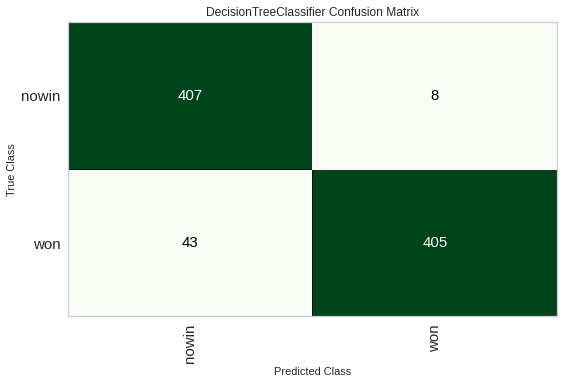

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [62]:
plot_model(tuned_best, plot = 'confusion_matrix')

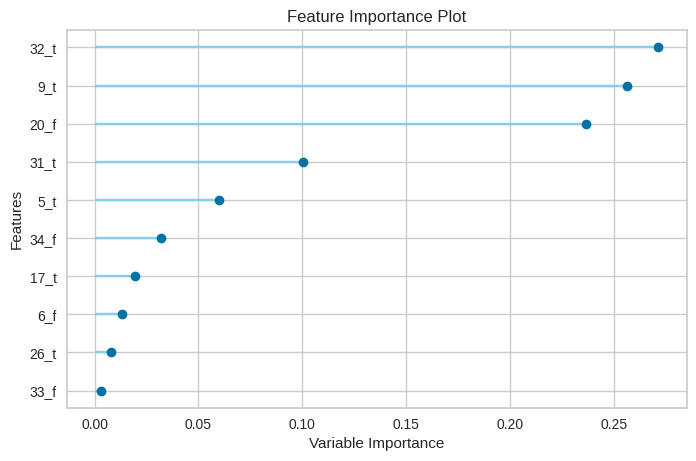

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [63]:
plot_model(tuned_best, plot = 'feature')

# 10.2 Classification Report

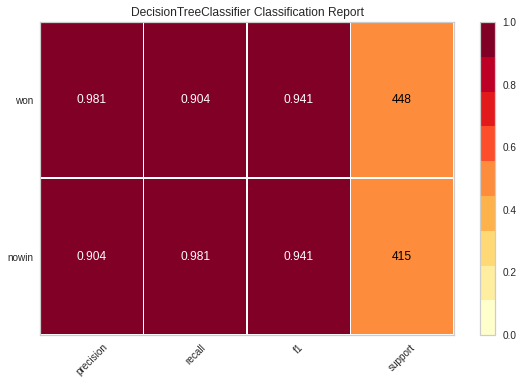

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [64]:
plot_model(tuned_best, plot = 'class_report')

# 10.3 Decision Boundary Plot

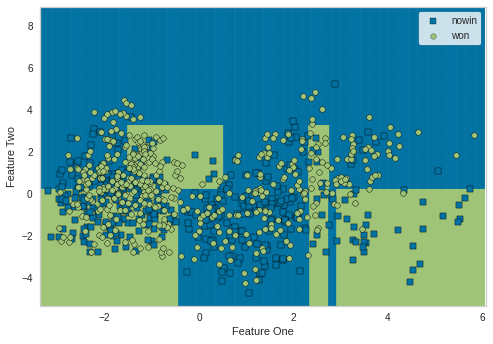

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [65]:
plot_model(tuned_best, plot='boundary')

# 10.4 Prediction Error Plot

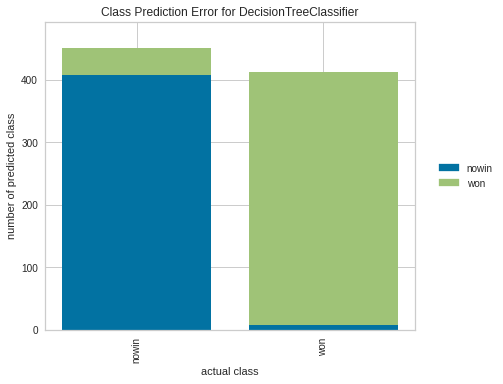

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [66]:
plot_model(tuned_best, plot = 'error')

*Another* way to analyze the performance of models is to use the `evaluate_model()` function which displays a user interface for all of the available plots for a given model. It internally uses the `plot_model()` function. 

In [67]:
evaluate_model(tuned_best)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# 11.0 Predict on test / hold-out Sample

Before finalizing the model, it is advisable to perform one final check by predicting the test/hold-out set and reviewing the evaluation metrics. If you look at the information grid in Section 6 above, you will see that 30% (41 samples) of the data has been separated out as a test/hold-out sample. All of the evaluation metrics we have seen above are cross validated results based on the training set (70%) only. Now, using our final trained model stored in the `tuned_knn` variable we will predict against the hold-out sample and evaluate the metrics to see if they are materially different than the CV results.

In [68]:
predict_model(tuned_best);

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best'), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.9409,0.9898,0.904,0.9806,0.9408,0.882,0.8849


The accuracy on the test/hold-out set is **`0.9409`** compared to **`0.9424`** achieved on the `tuned_best` CV results (in section 9.1 above). This is not a significant difference. If there is a large variation between the test/hold-out and CV results, then this would normally indicate over-fitting but could also be due to several other factors and would require further investigation. In this case, we will move forward with finalizing the model and predicting on unseen data (the 10% that we had separated in the beginning and never exposed to PyCaret).

(TIP : It's always good to look at the standard deviation of CV results when using `create_model()`.)

# 12.0 Finalize Model for Deployment

Model finalization is the last step in the experiment. A normal machine learning workflow in PyCaret starts with `setup()`, followed by comparing all models using `compare_models()` and shortlisting a few candidate models (based on the metric of interest) to perform several modeling techniques such as hyperparameter tuning, ensembling, stacking etc. This workflow will eventually lead you to the best model for use in making predictions on new and unseen data. The `finalize_model()` function fits the model onto the complete dataset including the test/hold-out sample (30% in this case). The purpose of this function is to train the model on the complete dataset before it is deployed in production.

In [70]:
final_best = finalize_model(tuned_best)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best'), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='depr

In [71]:
#Final K Nearest Neighbour parameters for deployment
print(final_best)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


# 13.0 Predict on unseen data

The `predict_model()` function is also used to predict on the unseen dataset. The only difference from section 11 above is that this time we will pass the `data_unseen` parameter. `data_unseen` is the variable created at the beginning of the tutorial and contains 10% (320 samples) of the original dataset which was never exposed to PyCaret. (see section 5 for explanation)

In [72]:
unseen_predictions = predict_model(final_best, data=data_unseen)
unseen_predictions.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best'), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0,0.9938,0,0,0,0,0


,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,Result,Label,Score
0,f,f,f,f,f,f,f,f,f,f,...,t,f,f,f,t,t,n,won,won,0.8967
1,f,f,f,f,f,f,f,f,t,f,...,f,f,f,f,t,t,n,won,won,0.8967
2,f,f,f,f,f,f,f,f,t,f,...,f,t,f,f,t,t,n,won,won,0.8967
3,f,f,f,f,t,f,t,f,f,f,...,f,f,f,f,t,t,n,won,won,0.8967
4,f,f,f,f,f,f,f,f,t,f,...,f,f,f,f,t,t,n,won,won,0.8967


The `Label` and `Score` columns are added onto the `data_unseen` set. Label is the prediction and score is the probability of the prediction. Notice that predicted results are concatenated to the original dataset while all the transformations are automatically performed in the background.

# 14.0 Saving the model

We have now finished the experiment by finalizing the `tuned_knn` model which is now stored in the `final_knn` variable. We have also used the model stored in `final_knn` to predict `data_unseen`. This brings us to the end of our experiment, but one question is still to be asked: What happens when you have more new data to predict? Do you have to go through the entire experiment again? The answer is no, PyCaret's inbuilt function `save_model()` allows you to save the model along with entire transformation pipeline for later use.

In [73]:
save_model(final_best,'Final Best Model 30Nov2022')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best'), model_name=Final Best Model 30Nov2022, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Result',
                                      time_features=[])),
             

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Result',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strat...
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                         criterion='entropy', max_depth=6,
                        

(TIP : It's always good to use date in the filename when saving models, it's good for version control.)

# 15.0 Loading the saved model

To load a saved model at a future date in the same or an alternative environment, we would use PyCaret's `load_model()` function and then easily apply the saved model on new unseen data for prediction.

In [74]:
saved_final_best = load_model('Final Best Model 30Nov2022')

INFO:logs:Initializing load_model()
INFO:logs:load_model(model_name=Final Best Model 30Nov2022, platform=None, authentication=None, verbose=True)


Transformation Pipeline and Model Successfully Loaded


Once the model is loaded in the environment, you can simply use it to predict on any new data using the same `predict_model()` function. Below we have applied the loaded model to predict the same `data_unseen` that we used in section 13 above.

In [75]:
new_prediction = predict_model(saved_final_best, data=data_unseen)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Result',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strat...
                ('dfs', 'passthrough'), ('pca', 'passthrough'),
                ['trained_model',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        cr

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0,0.9938,0,0,0,0,0


In [76]:
new_prediction.head()

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,Result,Label,Score
0,f,f,f,f,f,f,f,f,f,f,...,t,f,f,f,t,t,n,won,won,0.8967
1,f,f,f,f,f,f,f,f,t,f,...,f,f,f,f,t,t,n,won,won,0.8967
2,f,f,f,f,f,f,f,f,t,f,...,f,t,f,f,t,t,n,won,won,0.8967
3,f,f,f,f,t,f,t,f,f,f,...,f,f,f,f,t,t,n,won,won,0.8967
4,f,f,f,f,f,f,f,f,t,f,...,f,f,f,f,t,t,n,won,won,0.8967


Notice that the results of `unseen_predictions` and `new_prediction` are identical.

# 16.0 Wrap-up / Next Steps?

This tutorial has covered the entire machine learning pipeline from data ingestion, pre-processing, training the model, hyperparameter tuning, prediction and saving the model for later use. We have completed all of these steps in less than 10 commands which are naturally constructed and very intuitive to remember such as `create_model()`, `tune_model()`, `compare_models()`. Re-creating the entire experiment without PyCaret would have taken well over 100 lines of code in most libraries.

We have only covered the basics of `pycaret.classification`. In following tutorials we will go deeper into advanced pre-processing, ensembling, generalized stacking and other techniques that allow you to fully customize your machine learning pipeline and are must know for any data scientist. 